## Exercise 2.5

In [ ]:
import random
import numpy as np

# Assume the action values have mean 0 and variance 1 to start with.
# Assume 2000 runs.

K = 10
STEPS = 10000
RUNS = 2000

all_rewards_n = []
all_rewards_alpha = []

truth_count_n = [0] * STEPS
truth_count_alpha = [0] * STEPS

In [ ]:
def find_max_index(arr, criteria):
    max_value = max(arr)
    max_indices = [i for i, val in enumerate(arr) if val == max_value]
    return random.choice(max_indices)

def get_reward(index, Q_star):
  sample = np.random.normal(loc=Q_star[index], scale=1.0)
  return sample

In [ ]:
for run in range(0, RUNS):

  Q_n = [0.0] * K # sample-average approach
  visited_n = []
  reward_n = []
  N_n = [0] * K # number of steps

  Q_alpha = [0.0] * K # nonstationary approach
  visited_alpha = []
  reward_alpha = []
  N_alpha = [0] * K

  Q_star = [0] * K # ground-truth, non-stationary

  # We first select something to visit at random
  visited_n.append(random.randint(0, 9))
  visited_alpha.append(random.randint(0, 9))

  ground_truth_index = [i for i, val in enumerate(Q_star) if val == max(Q_star)]

  for step in range(0, STEPS):

    # Epsilon = 0.1, meaning only 0.1 chance to explore.
    explore = random.randint(1, 10)

    n_visit = 0   # index to visit
    alpha_visit = 0 # index to visit

    if explore == 1:
      n_visit = random.randint(0, 9)
      alpha_visit = random.randint(0, 9)

      visited_n.append(n_visit)
      visited_alpha.append(alpha_visit)

    else:
      n_visit = find_max_index(Q_n, visited_n)
      alpha_visit = find_max_index(Q_alpha, visited_alpha)

    N_n[n_visit] = N_n[n_visit] + 1
    N_alpha[alpha_visit] = N_alpha[alpha_visit] + 1

    immediate_reward_n = get_reward(n_visit, Q_star)
    immediate_reward_alpha = get_reward(alpha_visit, Q_star)

    Q_n[n_visit] += (1/N_n[n_visit]) * (immediate_reward_n - Q_n[n_visit])
    Q_alpha[alpha_visit] += 0.1 * (immediate_reward_alpha - Q_alpha[alpha_visit])

    reward_n.append(Q_n[n_visit])
    reward_alpha.append(Q_alpha[alpha_visit])

    if n_visit in ground_truth_index:
      truth_count_n[step] += 1
    if alpha_visit in ground_truth_index:
      truth_count_alpha[step] += 1

    # Keeping ground-truth consistent across experiments
    for i in range(0, len(Q_star)):
      Q_star[i] += np.random.normal(loc=0, scale=0.01)

    ground_truth_index = [i for i, val in enumerate(Q_star) if val == max(Q_star)]


  if run % 10 == 0:
    print("epoch ", run)

  all_rewards_n.append(reward_n)
  all_rewards_alpha.append(reward_alpha)


epoch  0
epoch  10
epoch  20
epoch  30
epoch  40
epoch  50
epoch  60
epoch  70
epoch  80
epoch  90
epoch  100
epoch  110
epoch  120
epoch  130
epoch  140
epoch  150
epoch  160
epoch  170
epoch  180
epoch  190
epoch  200
epoch  210
epoch  220
epoch  230
epoch  240
epoch  250
epoch  260
epoch  270
epoch  280
epoch  290
epoch  300
epoch  310
epoch  320
epoch  330
epoch  340
epoch  350
epoch  360
epoch  370
epoch  380
epoch  390
epoch  400
epoch  410
epoch  420
epoch  430
epoch  440
epoch  450
epoch  460
epoch  470
epoch  480
epoch  490
epoch  500
epoch  510
epoch  520
epoch  530
epoch  540
epoch  550
epoch  560
epoch  570
epoch  580
epoch  590
epoch  600
epoch  610
epoch  620
epoch  630
epoch  640
epoch  650
epoch  660
epoch  670
epoch  680
epoch  690
epoch  700
epoch  710
epoch  720
epoch  730
epoch  740
epoch  750
epoch  760
epoch  770
epoch  780
epoch  790
epoch  800
epoch  810
epoch  820
epoch  830
epoch  840
epoch  850
epoch  860
epoch  870
epoch  880
epoch  890
epoch  900
epoch  910

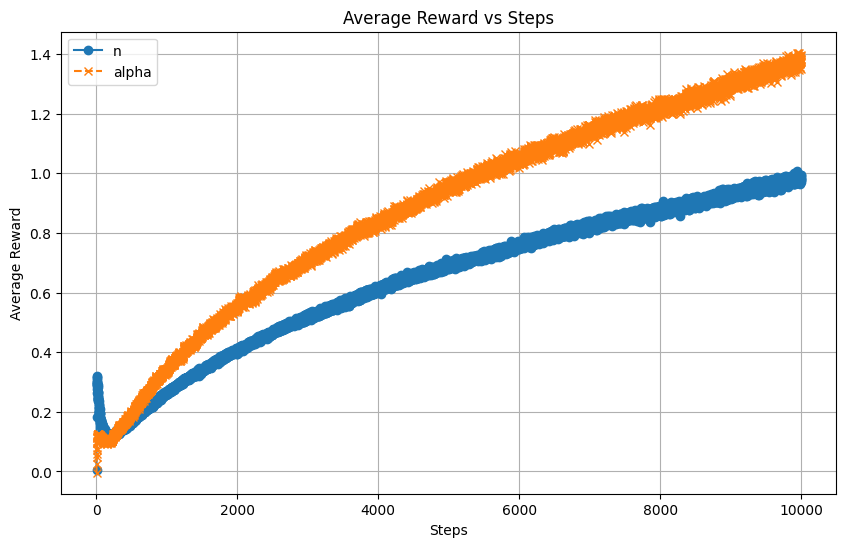

In [ ]:
import matplotlib.pyplot as plt

total_reward_n = np.mean(all_rewards_n, axis=0)
total_reward_alpha = np.mean(all_rewards_alpha, axis=0)


# Generate steps (index + 1)
steps_n = [i+1 for i in range(len(reward_n))]
steps_alpha = [i+1 for i in range(len(reward_alpha))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(steps_n, total_reward_n, label='n', marker='o', linestyle='-')
plt.plot(steps_alpha, total_reward_alpha, label='alpha', marker='x', linestyle='--')

# Formatting
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps')
plt.legend()
plt.grid(True)
plt.show()

[2000, 187, 209, 210, 186, 187, 202, 222, 202, 207, 223, 196, 200, 223, 213, 207, 229, 219, 213, 220, 214, 216, 217, 245, 233, 235, 226, 228, 227, 246, 245, 239, 242, 257, 232, 240, 242, 266, 242, 249, 257, 261, 241, 261, 247, 256, 250, 253, 246, 241, 243, 256, 249, 255, 264, 285, 271, 279, 269, 274, 255, 260, 268, 268, 281, 272, 280, 280, 270, 269, 267, 270, 262, 275, 280, 286, 274, 287, 289, 286, 287, 277, 261, 287, 270, 287, 303, 289, 285, 279, 294, 277, 281, 283, 279, 278, 295, 297, 292, 311, 289, 309, 299, 283, 273, 276, 297, 309, 290, 301, 287, 290, 299, 303, 295, 302, 317, 296, 313, 318, 305, 318, 325, 326, 332, 329, 321, 325, 311, 328, 330, 332, 332, 328, 326, 334, 334, 336, 310, 336, 323, 345, 336, 353, 340, 334, 343, 341, 341, 340, 336, 339, 333, 351, 345, 353, 349, 361, 334, 352, 374, 357, 362, 348, 350, 352, 352, 340, 330, 348, 334, 353, 347, 344, 370, 348, 361, 350, 365, 362, 370, 356, 363, 352, 349, 348, 347, 340, 343, 344, 355, 363, 358, 371, 375, 359, 373, 363, 374, 369

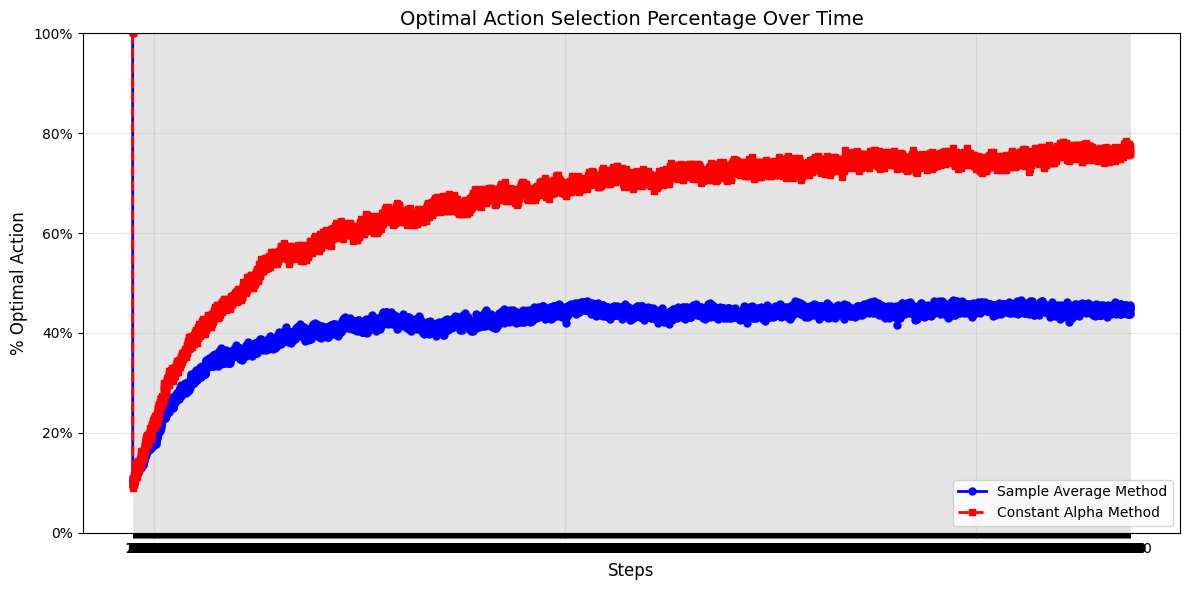

In [ ]:
print(truth_count_n)
print(truth_count_alpha)

# Convert counts to percentages
percentage_n = [(count / RUNS) * 100 for count in truth_count_n]
percentage_alpha = [(count / RUNS) * 100 for count in truth_count_alpha]

# Create steps array (1-based index)
steps = np.arange(1, len(truth_count_n) + 1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both series
plt.plot(steps, percentage_n,
         label='Sample Average Method',
         color='blue',
         linewidth=2,
         marker='o',
         markersize=5)

plt.plot(steps, percentage_alpha,
         label='Constant Alpha Method',
         color='red',
         linewidth=2,
         linestyle='--',
         marker='s',
         markersize=5)

# Formatting
plt.xlabel('Steps', fontsize=12)
plt.ylabel('% Optimal Action', fontsize=12)
plt.title('Optimal Action Selection Percentage Over Time', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)  # Ensure percentage scale from 0-100%

# Add percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Show every 10th step on x-axis for clarity
plt.xticks(np.arange(0, len(steps)+1, 10))

plt.tight_layout()
plt.show()

Exercise 2.11 is omitted because of the RAM it takes...